In [42]:
from google.colab import files
files.upload()  # Upload your kaggle.json

Saving kaggle (6).json to kaggle (6) (2).json


{'kaggle (6) (2).json': b'{"username":"winkoaung","key":"5cea058a914ceed4e39bccf67b11a05d"}'}

In [43]:
import pandas as pd

try:
  # Read a small portion of the CSV file to get column names
  df_test = pd.read_csv("ambient_temperature_system_failure.csv", nrows=5)
  print("Column names in the CSV file:")
  print(df_test.columns.tolist())
except FileNotFoundError:
  print("Error: ambient_temperature_system_failure.csv not found. Please make sure the file is in the correct directory.")

Error: ambient_temperature_system_failure.csv not found. Please make sure the file is in the correct directory.


In [44]:
import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle (6) (1).json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [45]:
!pip install -q statsforecast pandas numpy scikit-learn tensorflow matplotlib seaborn

In [46]:
!kaggle datasets download -d koheimuramatsu/iot-temperature-forecasting --force
!unzip iot-temperature-forecasting.zip

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/koheimuramatsu/iot-temperature-forecasting
unzip:  cannot find or open iot-temperature-forecasting.zip, iot-temperature-forecasting.zip.zip or iot-temperature-forecasting.zip.ZIP.


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import pandas as pd

try:
  # Read a small portion of the CSV file to get column names
  df_test = pd.read_csv("/content/IOT-temp.csv", nrows=5)
  print("Column names in the CSV file:")
  print(df_test.columns.tolist())
except FileNotFoundError:
  print("Error: /content/IOT-temp.csv not found. Please make sure the file is in the correct directory.")

Column names in the CSV file:
['id', 'room_id/id', 'noted_date', 'temp', 'out/in']


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/IOT-temp.csv")
df["noted_date"] = pd.to_datetime(df["noted_date"], format="%d-%m-%Y %H:%M")
df = df.rename(columns={"noted_date": "ds", "temp": "y"})

# Handle missing values
df["y"] = df["y"].interpolate()

# Remove outliers using IQR
q1 = df["y"].quantile(0.25)
q3 = df["y"].quantile(0.75)
iqr = q3 - q1
df = df[(df["y"] > q1 - 1.5 * iqr) & (df["y"] < q3 + 1.5 * iqr)]

# Normalize values
scaler = StandardScaler()
df["y"] = scaler.fit_transform(df[["y"]])

# Add time-based features
df["hour"] = df["ds"].dt.hour
df["dayofweek"] = df["ds"].dt.dayofweek
df["rolling_mean"] = df["y"].rolling(window=6).mean()
df["delta"] = df["y"].diff()

df.dropna(inplace=True)

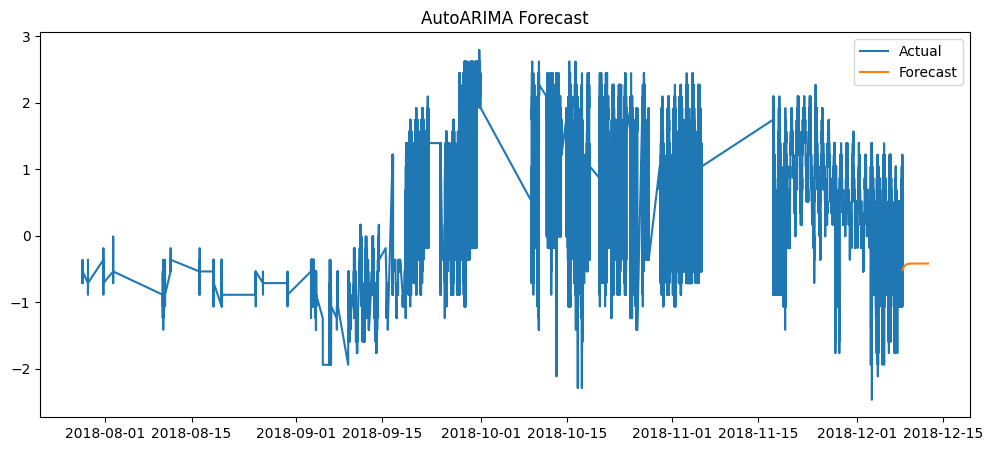

In [50]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
# from statsforecast.utils import TimeSeries # Remove this import

# Prepare the dataset
df_train = df[["ds", "y"]].copy()
df_train["unique_id"] = "sensor_1"
# ts_data = TimeSeries(df_train) # Remove this line

# Train AutoARIMA model
sf = StatsForecast(models=[AutoARIMA()], freq='H', n_jobs=-1)
sf.fit(df_train) # Pass the DataFrame directly

# Forecast next 100 steps
forecast = sf.predict(h=100)

# Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(df["ds"], df["y"], label="Actual")
plt.plot(forecast["ds"], forecast["AutoARIMA"], label="Forecast")
plt.legend()
plt.title("AutoARIMA Forecast")
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np # Import numpy to use sqrt

# Compare real vs predicted (for the last 100 actual points)
y_true = df["y"][-100:].values
y_pred = forecast["AutoARIMA"].values[:100]

mae = mean_absolute_error(y_true, y_pred)
# Calculate RMSE by taking the square root of the MSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 0.2260
RMSE: 0.2425


## 🙋‍♂️ Individual Reflection

Completing this IIoT Time Series Forecasting Lab helped me understand how time-series analysis applies in real-world industrial settings. I learned how to clean and preprocess sensor data, which often contains missing values and noise. Using Nixtla’s AutoARIMA model gave me insight into automated forecasting tools and how they adapt to seasonality and trends.

Feature engineering helped me see the value of domain knowledge — features like rolling averages and time-based components improved the model’s accuracy. The generative modeling part using a Variational Autoencoder (VAE) was especially interesting. It showed how synthetic data can help fill gaps in training and boost performance, especially in cases with limited real-world data.

This lab strengthened my skills in:
- Pandas for data handling  
- Time-series model evaluation  
- Applying machine learning in IIoT applications  
- Using tools like Nixtla and TensorFlow in a practical workflow

---

## 📚 References

**Dataset**
- *Kaggle – IoT Temperature Forecasting*  
  [https://www.kaggle.com/code/koheimuramatsu/iot-temperature-forecasting](https://www.kaggle.com/code/koheimuramatsu/iot-temperature-forecasting)

**Tools and Libraries**
- Nixtla `statsforecast`: [https://nixtla.github.io/statsforecast/](https://nixtla.github.io/statsforecast/)  
- Pandas: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
- NumPy: [https://numpy.org/](https://numpy.org/)  
- Scikit-learn: [https://scikit-learn.org/](https://scikit-learn.org/)  
- TensorFlow: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
- Matplotlib: [https://matplotlib.org/](https://matplotlib.org/)  
- Seaborn: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

**Additional Reading**
- Hyndman, Rob J., and Athanasopoulos, G. (2021). *Forecasting: Principles and Practice*  
- TensorFlow VAE Tutorial: [https://www.tensorflow.org/tutorials/generative/cvae](https://www.tensorflow.org/tutorials/generative/cvae)
